## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [8]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from plotnine import *
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1')
data.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [47]:
X = data[['age', 'chol']]
y = data['diagnosis']

y = y.map({'Disease': 1, 'No Disease': 0})

ct_pre = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

pipeline = Pipeline(
    [('preprocessing', ct_pre),
     ('logit', LogisticRegression())]
)

pipeline.fit(X, y)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a60c8960280>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a60c8961ea0>)])),
                ('logit', LogisticRegression())])

In [12]:
# create df with fake observations with 55 as value of age for all of them, and then a sequence of different values for cholesterol, then plot predicted probabilities of cholesterol levels for heart disease
min_chol = data['chol'].min()
max_chol = data['chol'].max()

print(min_chol)
print(max_chol)

chol_levels = np.linspace(min_chol, max_chol, 100)

df_55 = pd.DataFrame({
    'age': [55] * 100,  # Fixed age = 55
    'chol': chol_levels  # Cholesterol levels ranging from min to max
})

print(df_55)

126
564
    age        chol
0    55  126.000000
1    55  130.424242
2    55  134.848485
3    55  139.272727
4    55  143.696970
..  ...         ...
95   55  546.303030
96   55  550.727273
97   55  555.151515
98   55  559.575758
99   55  564.000000

[100 rows x 2 columns]


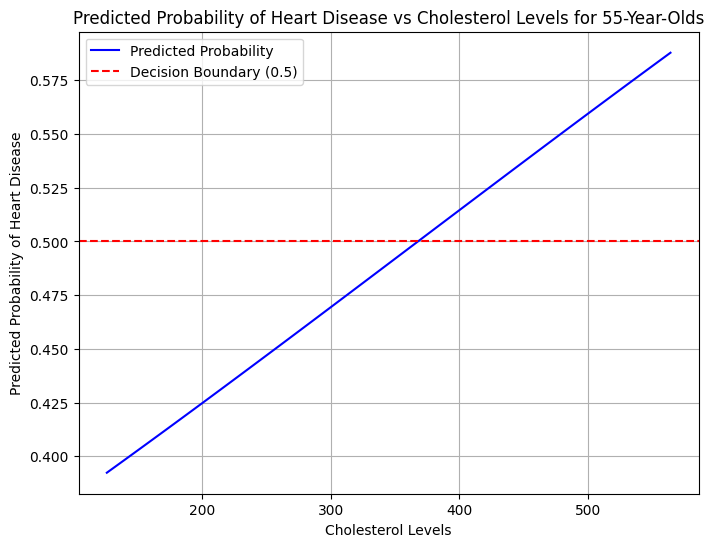

In [13]:
# predict probbabilities for each chol level for each 55 year old
df_55['predicted_probability'] = pipeline.predict_proba(df_55)[:, 0]
df_55


plt.figure(figsize=(8, 6))
plt.plot(df_55['chol'], df_55['predicted_probability'], label='Predicted Probability', color='blue')
plt.title('Predicted Probability of Heart Disease vs Cholesterol Levels for 55-Year-Olds')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Predicted Probability of Heart Disease')
plt.grid(True)
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
plt.legend()
plt.show()

Looks like cholesterol would have to be about 370 to be at 50% probability of having heart disease.

In [17]:
chol_levels = np.linspace(min_chol, 2000, 1000)

df_55_1000 = pd.DataFrame({
    'age': [55] * 1000,  # Fixed age = 55
    'chol': chol_levels  # Cholesterol levels ranging from min to max
})

print(df_55_1000)

     age         chol
0     55   126.000000
1     55   127.875876
2     55   129.751752
3     55   131.627628
4     55   133.503504
..   ...          ...
995   55  1992.496496
996   55  1994.372372
997   55  1996.248248
998   55  1998.124124
999   55  2000.000000

[1000 rows x 2 columns]


In [18]:
df_55_1000['predicted_probability'] = pipeline.predict_proba(df_55_1000)[:, 0]
df_55_1000

,age,chol,predicted_probability
0,55,126.000000,0.392376
1,55,127.875876,0.393185
2,55,129.751752,0.393996
3,55,131.627628,0.394806
4,55,133.503504,0.395617
...,...,...,...
995,55,1992.496496,0.949774
996,55,1994.372372,0.949935
997,55,1996.248248,0.950096
998,55,1998.124124,0.950257


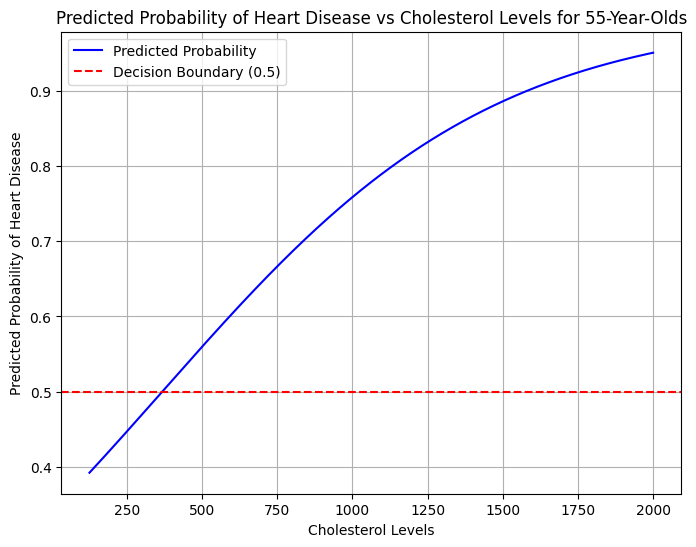

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(df_55_1000['chol'], df_55_1000['predicted_probability'], label='Predicted Probability', color='blue')
plt.title('Predicted Probability of Heart Disease vs Cholesterol Levels for 55-Year-Olds')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Predicted Probability of Heart Disease')
plt.grid(True)
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
plt.legend()
plt.show()

In [20]:
observation = df_55_1000.iloc[777]
print(observation)

age                        55.000000
chol                     1583.555556
predicted_probability       0.900231
Name: 777, dtype: float64


It seems like a cholesterol level of about 1584 would be the threshold for a doctor to estimate a 90% of heart disease in a 55 year old patient.

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

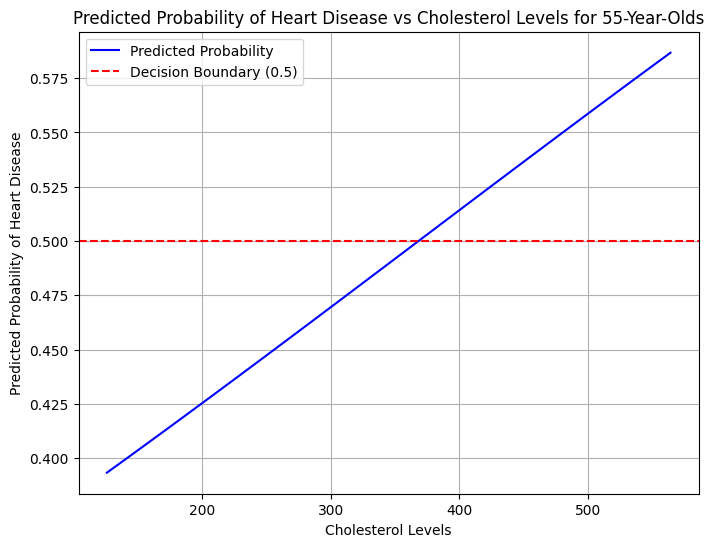

In [25]:
lda_pipeline = Pipeline(
    [('preprocessing', ct_pre),
     ('lda', LinearDiscriminantAnalysis())]
)

lda_pipeline.fit(X, y)

df_55['predicted_probability'] = lda_pipeline.predict_proba(df_55)[:, 0]
df_55


plt.figure(figsize=(8, 6))
plt.plot(df_55['chol'], df_55['predicted_probability'], label='Predicted Probability', color='blue')
plt.title('Predicted Probability of Heart Disease vs Cholesterol Levels for 55-Year-Olds')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Predicted Probability of Heart Disease')
plt.grid(True)
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
plt.legend()
plt.show()

The estimates are nearly identical to the logistic regression, which would be a cholesterol level of about 360.

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

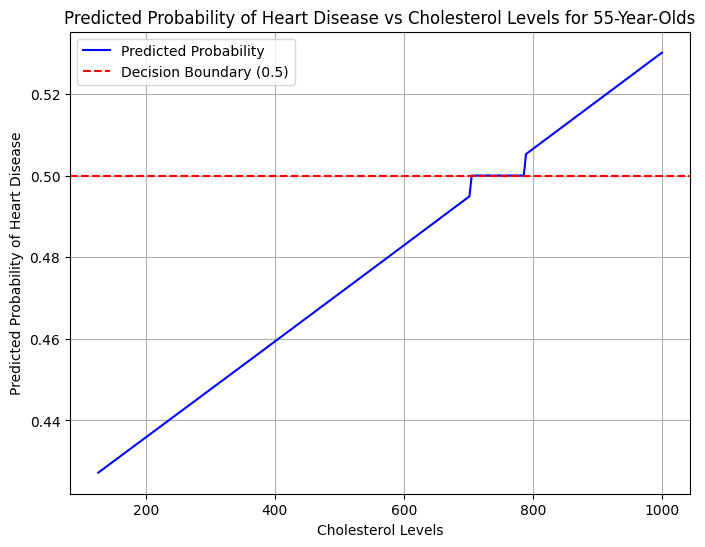

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Example pipeline with SVC
svc_pipeline = Pipeline([
    ('preprocessing', ct_pre),  # Standardize the features
    ('svc', SVC(kernel='linear', probability=True))  # SVC step
])

svc_pipeline.fit(X, y)

chol_levels = np.linspace(min_chol, 1000, 250)
df_55_250 = pd.DataFrame({
    'age': [55] * 250,  # Fixed age = 55
    'chol': chol_levels  # Cholesterol levels ranging from min to max
})
df_55_250

df_55_250['predicted_probability'] = svc_pipeline.predict_proba(df_55_250)[:, 0]


plt.figure(figsize=(8, 6))
plt.plot(df_55_250['chol'], df_55_250['predicted_probability'], label='Predicted Probability', color='blue')
plt.title('Predicted Probability of Heart Disease vs Cholesterol Levels for 55-Year-Olds')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Predicted Probability of Heart Disease')
plt.grid(True)
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
plt.legend()
plt.show()

The linear SVC has a cholesterol level of about 625 to be considered to have a 50% chance of having heart disease.

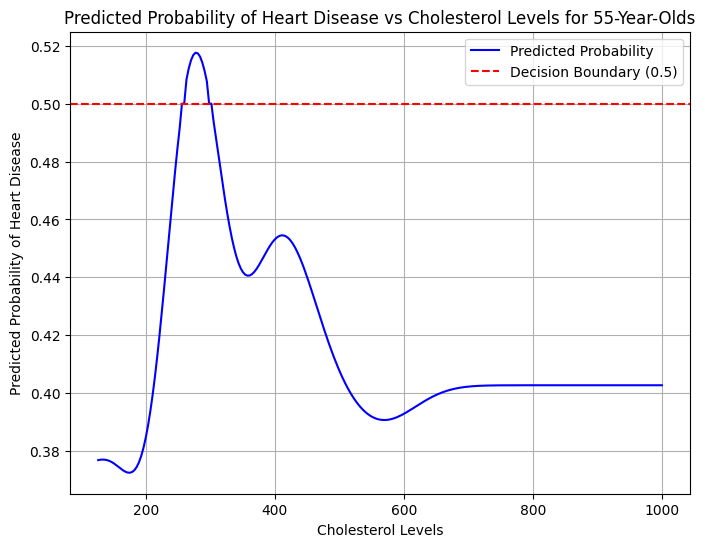

In [44]:
# svc_pipeline = Pipeline([
#     ('preprocessing', ct_pre),  # Standardize the features
#     ('svc', SVC(kernel='rbf', probability=True))  # SVC step
# ])

# svc_pipeline.fit(X, y)

# chol_levels = np.linspace(min_chol, 1000, 250)
# df_55_250 = pd.DataFrame({
#     'age': [55] * 250,  # Fixed age = 55
#     'chol': chol_levels  # Cholesterol levels ranging from min to max
# })
# df_55_250

# df_55_250['predicted_probability'] = svc_pipeline.predict_proba(df_55_250)[:, 0]


# plt.figure(figsize=(8, 6))
# plt.plot(df_55_250['chol'], df_55_250['predicted_probability'], label='Predicted Probability', color='blue')
# plt.title('Predicted Probability of Heart Disease vs Cholesterol Levels for 55-Year-Olds')
# plt.xlabel('Cholesterol Levels')
# plt.ylabel('Predicted Probability of Heart Disease')
# plt.grid(True)
# plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
# plt.legend()
# plt.show()

This is what the radial kernel looks like, which is difficult to interpret.

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

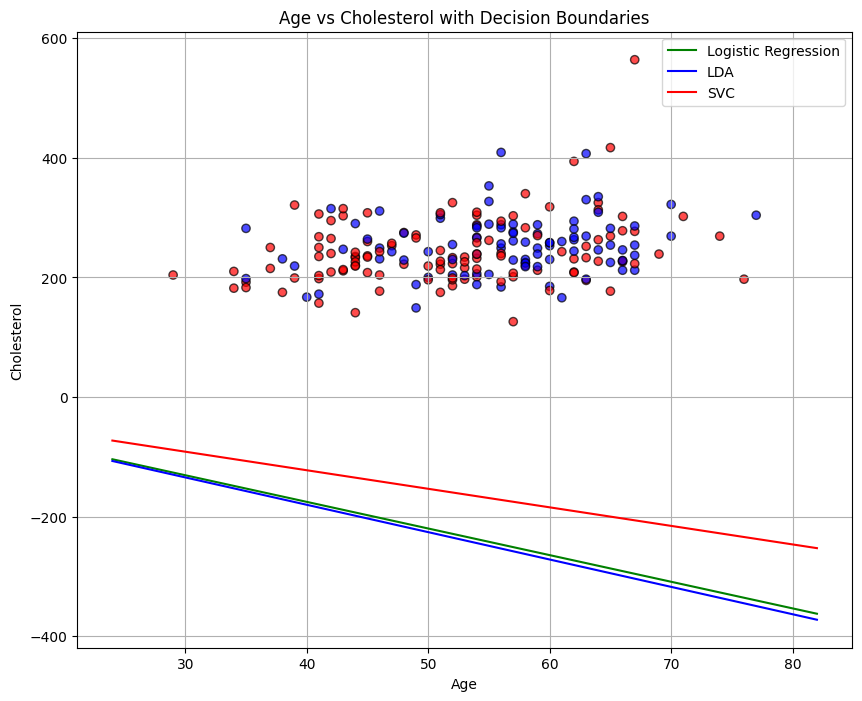

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant features and labels
X_plot = X[['age', 'chol']]
y_plot = y

# Create a meshgrid for plotting decision boundaries
x_min, x_max = X_plot['age'].min() - 5, X_plot['age'].max() + 5
y_min, y_max = X_plot['chol'].min() - 10, X_plot['chol'].max() + 10
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Scatterplot: Age vs Chol, colored by true outcome
plt.figure(figsize=(10, 8))
plt.scatter(X_plot['age'], X_plot['chol'], c=y_plot, cmap='bwr', alpha=0.7, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs Cholesterol with Decision Boundaries')
plt.grid()

# Logistic Regression Decision Boundary
logit_coef = pipeline.named_steps['logit'].coef_[0]
logit_intercept = pipeline.named_steps['logit'].intercept_[0]
decision_boundary_logit = -(logit_coef[0] * xx + logit_intercept) / logit_coef[1]
plt.plot(xx[0, :], decision_boundary_logit[0, :], color='green', label='Logistic Regression')

# LDA Decision Boundary
lda_coef = lda_pipeline.named_steps['lda'].coef_[0]
lda_intercept = lda_pipeline.named_steps['lda'].intercept_[0]
decision_boundary_lda = -(lda_coef[0] * xx + lda_intercept) / lda_coef[1]
plt.plot(xx[0, :], decision_boundary_lda[0, :], color='blue', label='LDA')

# SVC Decision Boundary
svc_coef = svc_pipeline.named_steps['svc'].coef_[0]
svc_intercept = svc_pipeline.named_steps['svc'].intercept_[0]
decision_boundary_svc = -(svc_coef[0] * xx + svc_intercept) / svc_coef[1]
plt.plot(xx[0, :], decision_boundary_svc[0, :], color='red', label='SVC')

# Add legend
plt.legend()
plt.show()
